In [17]:
# Link to my Github repositry: https://github.com/Omar-HA-Issa/ML-fundamentals-2025

## Task 1: Exploratory Data Analysis

Dataset loaded: 17379 rows, 17 columns
Missing values: 0

Target Variable Analysis:

Target Variable (cnt) Statistics:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64
Skewness: 1.28
Number of outliers: 505 (2.91% of data)


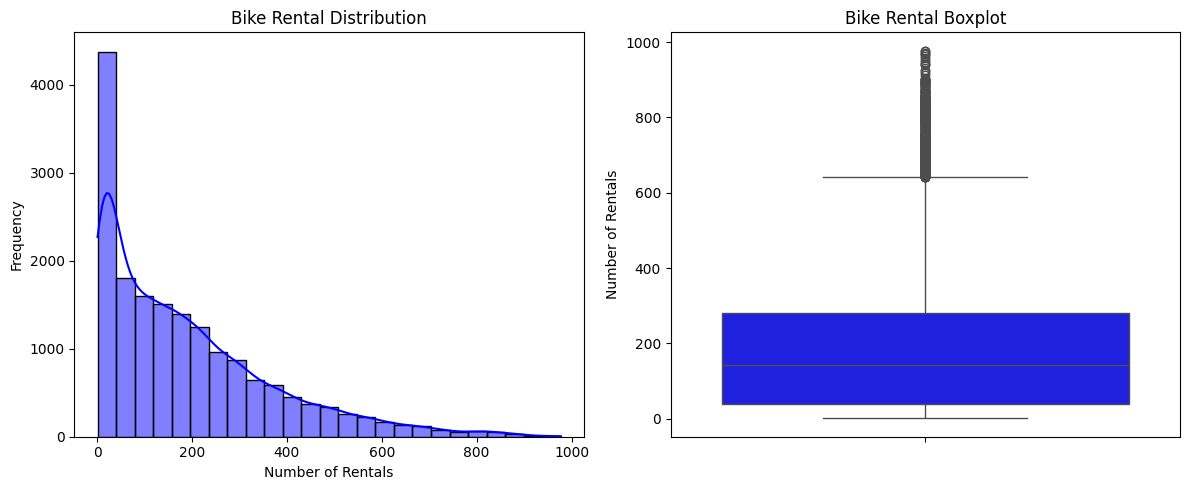


Temporal Features Analysis:


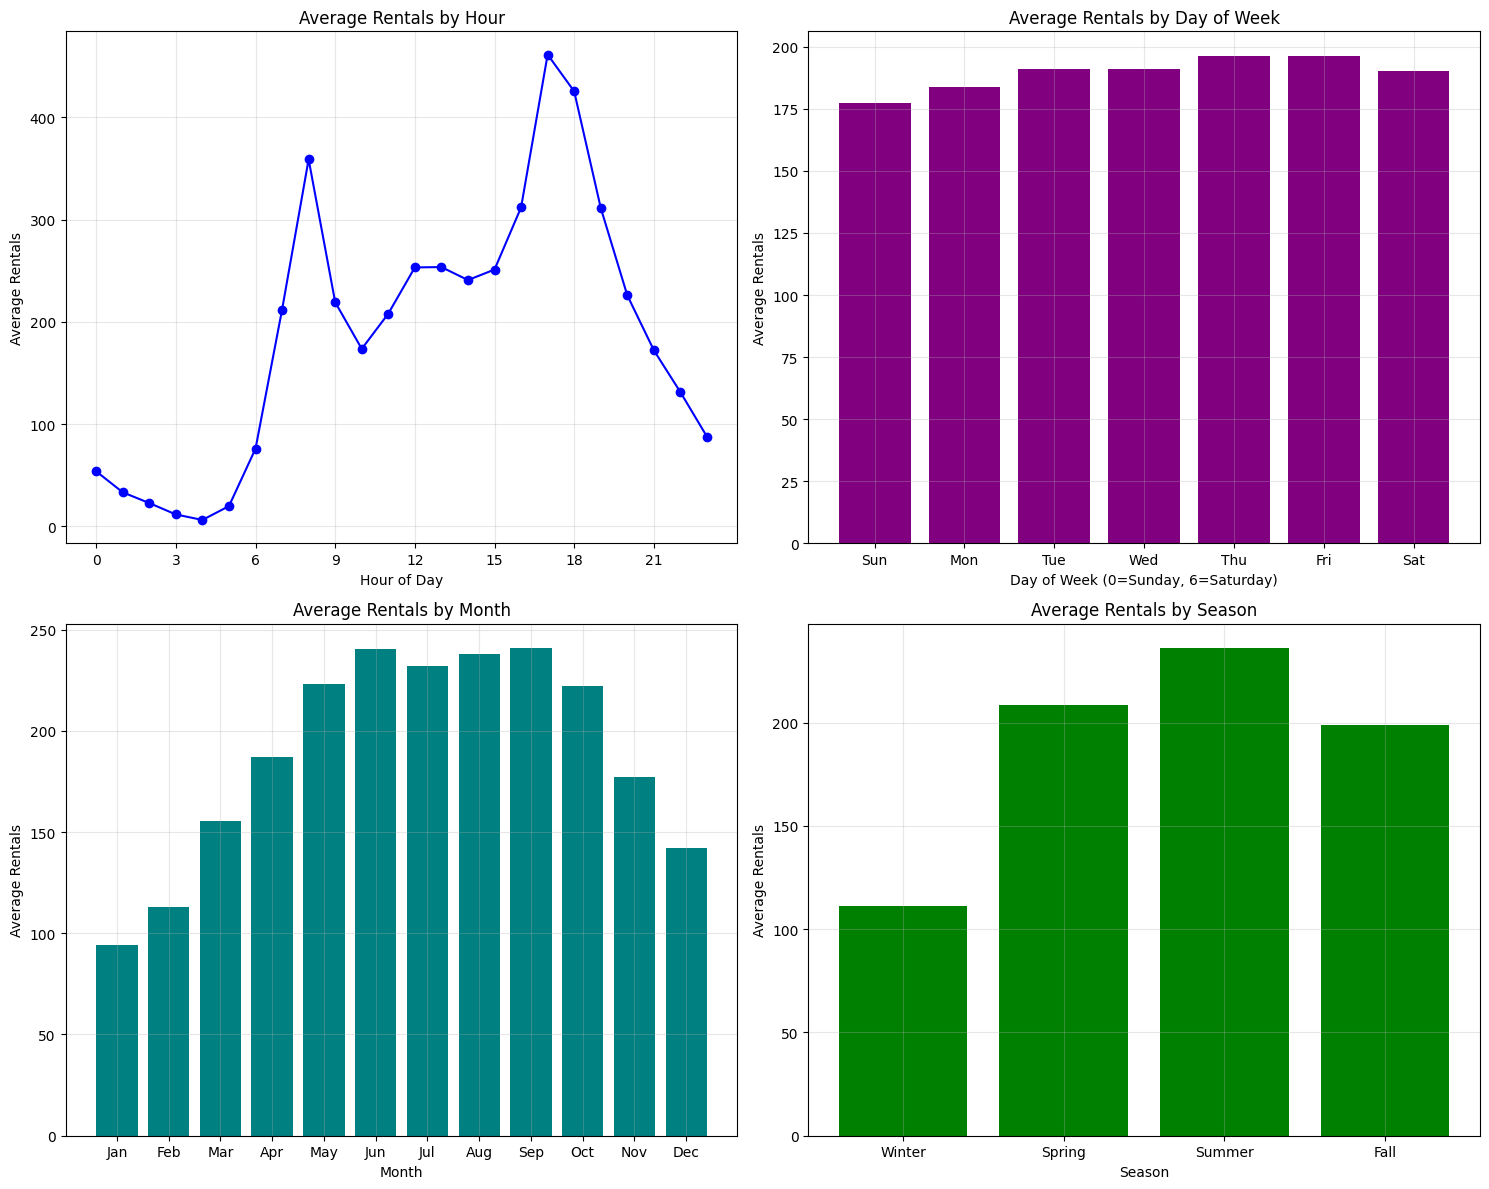


Binary Features Analysis:


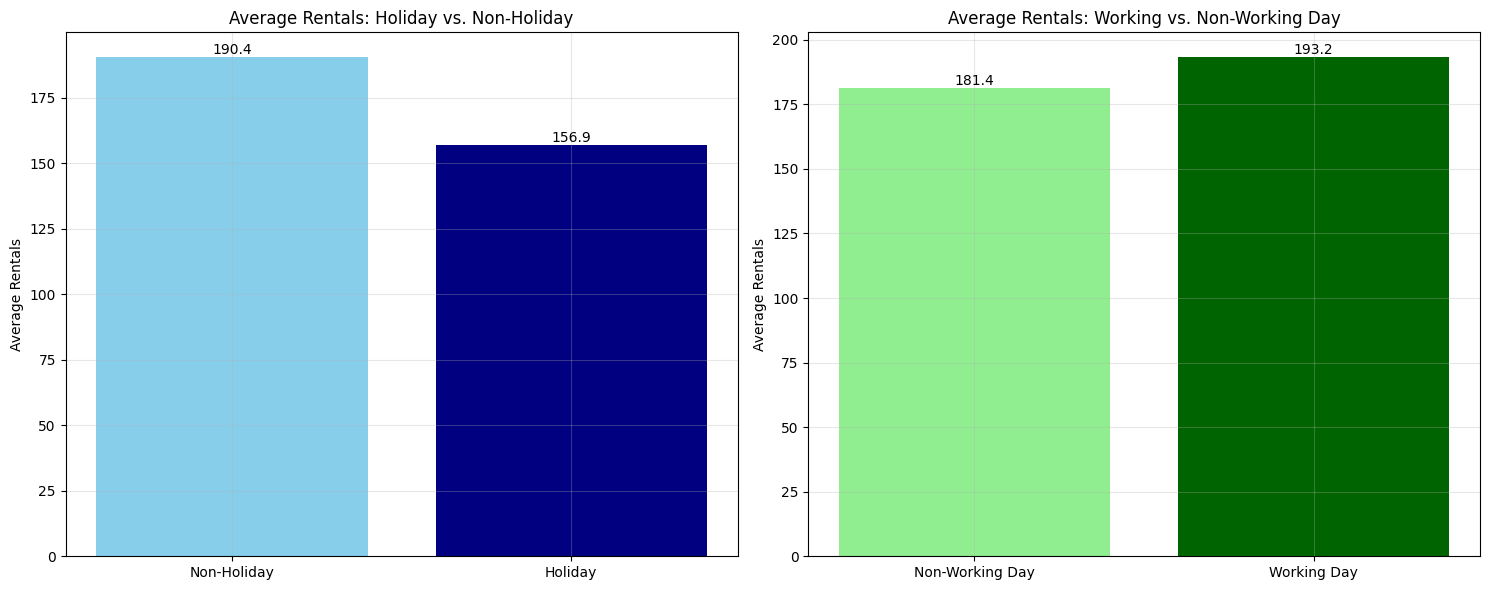


Weather-Related Features Analysis:


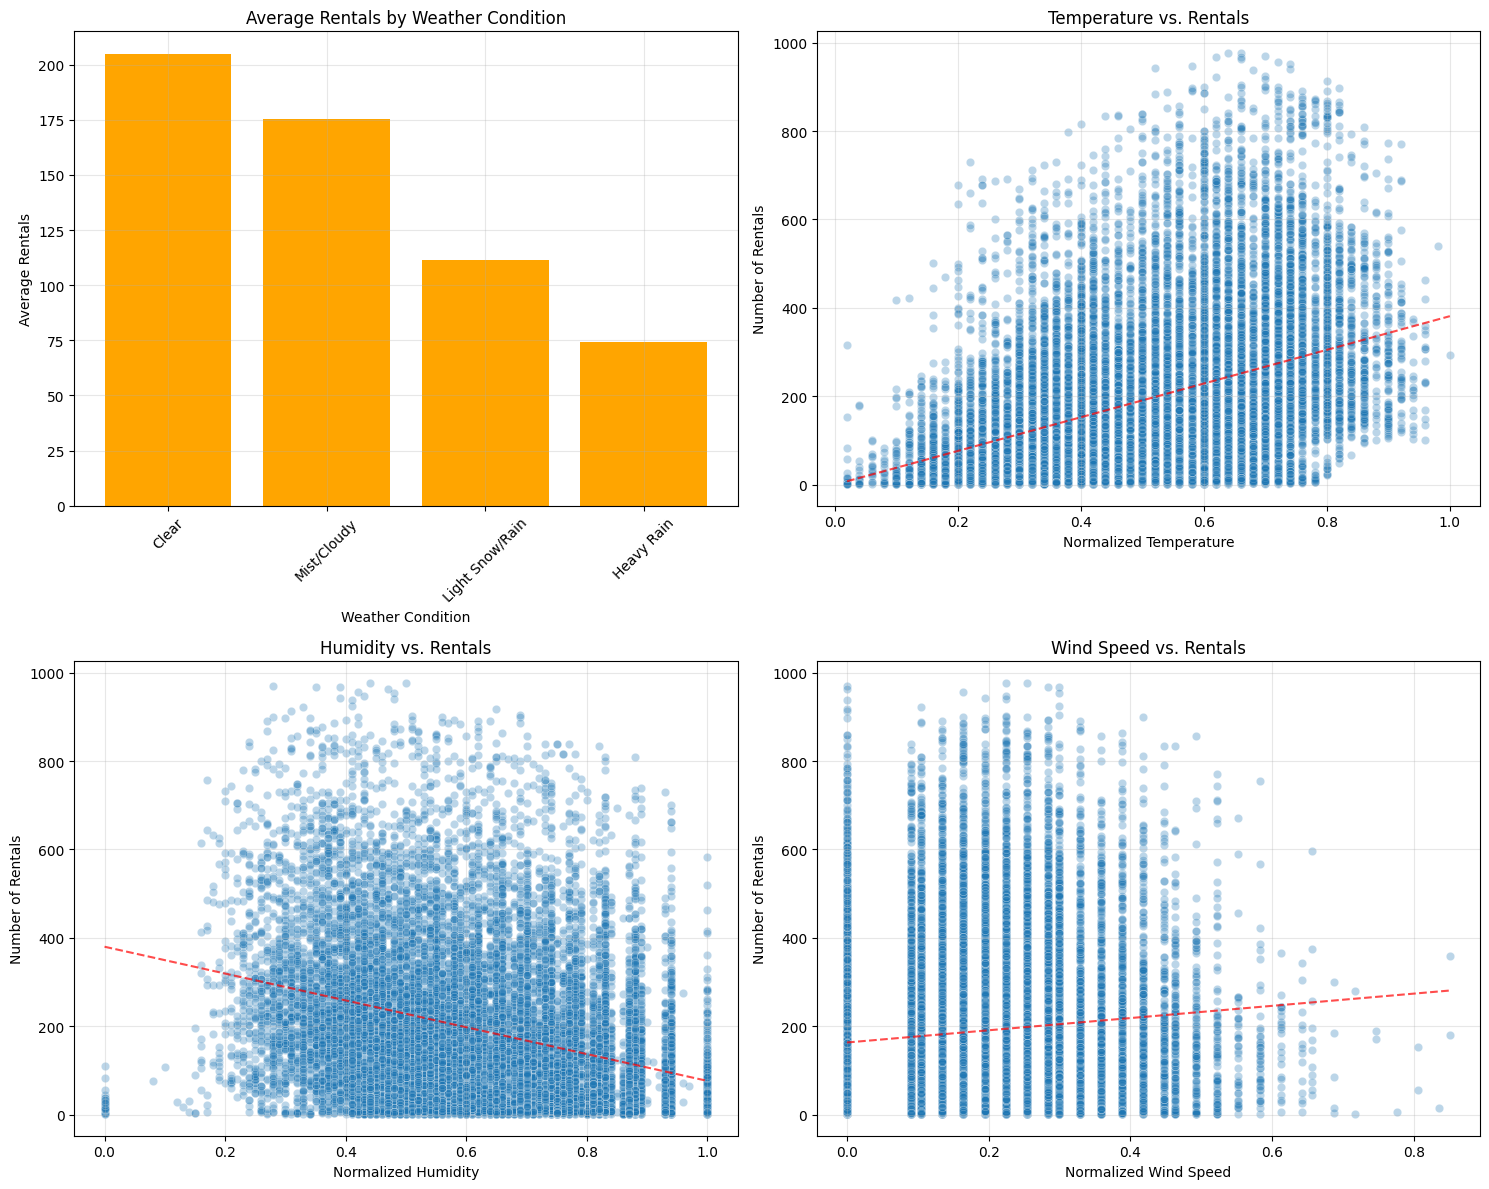


Correlation Matrix:


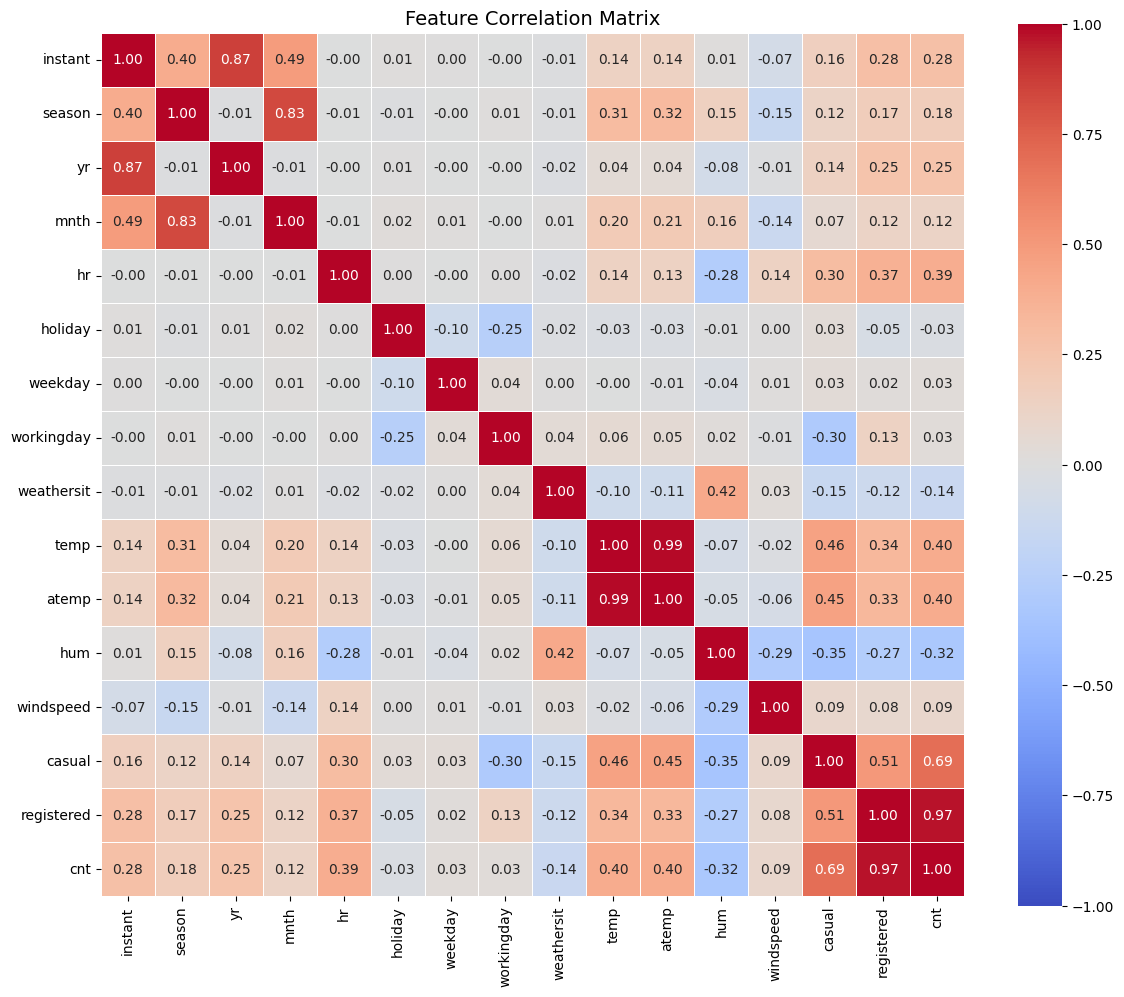

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv(r'C:\Users\Omar Issa\Downloads\hour.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Missing values: {df.isnull().sum().sum()}")

# Setting a style and figure size
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.labelsize'] = 10 
plt.rcParams['axes.titlesize'] = 12

# ---- 1. Target Variable Analysis ----
print("\nTarget Variable Analysis:")
plt.figure(figsize=(12, 5))

# Calculate statistics and identify outliers
print("\nTarget Variable (cnt) Statistics:")
print(df['cnt'].describe())
print(f"Skewness: {df['cnt'].skew():.2f}")

Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}% of data)")

# Target distribution and boxplot:
plt.subplot(1, 2, 1)
sns.histplot(df['cnt'], bins=25, kde=True, color='blue')
plt.title('Bike Rental Distribution')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['cnt'], color='blue')
plt.title('Bike Rental Boxplot')
plt.ylabel('Number of Rentals')

plt.tight_layout()
plt.show()

# ---- 2. Temporal Features Analysis ----
print("\nTemporal Features Analysis:")
plt.figure(figsize=(15, 12))

# Hour patterns
plt.subplot(2, 2, 1)
hourly = df.groupby('hr')['cnt'].mean()
plt.plot(hourly.index, hourly.values, 'o-', color='blue')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24, 3))
plt.grid(True, alpha=0.3)

# Weekday patterns
plt.subplot(2, 2, 2)
weekday_avg = df.groupby('weekday')['cnt'].mean()
plt.bar(weekday_avg.index, weekday_avg.values, color='purple')
plt.title('Average Rentals by Day of Week')
plt.xlabel('Day of Week (0=Sunday, 6=Saturday)')
plt.ylabel('Average Rentals')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True, alpha=0.3)

# Month patterns
plt.subplot(2, 2, 3)
monthly_avg = df.groupby('mnth')['cnt'].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color='teal')
plt.title('Average Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)

# Season patterns
plt.subplot(2, 2, 4)
season_avg = df.groupby('season')['cnt'].mean()
season_names = ['Winter', 'Spring', 'Summer', 'Fall']
plt.bar(range(len(season_avg)), season_avg.values, color='green')
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(range(len(season_avg)), season_names)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---- 3. Binary Features Analysis ----
print("\nBinary Features Analysis:")
plt.figure(figsize=(15, 6))

# Holiday impact
plt.subplot(1, 2, 1)
holiday_avg = df.groupby('holiday')['cnt'].mean()
plt.bar(['Non-Holiday', 'Holiday'], holiday_avg.values, color=['skyblue', 'navy'])
plt.title('Average Rentals: Holiday vs. Non-Holiday')
plt.ylabel('Average Rentals')
plt.annotate(f"{holiday_avg[0]:.1f}", (0, holiday_avg[0]), ha='center', va='bottom')
plt.annotate(f"{holiday_avg[1]:.1f}", (1, holiday_avg[1]), ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# Workingday impact
plt.subplot(1, 2, 2)
workingday_avg = df.groupby('workingday')['cnt'].mean()
plt.bar(['Non-Working Day', 'Working Day'], workingday_avg.values, color=['lightgreen', 'darkgreen'])
plt.title('Average Rentals: Working vs. Non-Working Day')
plt.ylabel('Average Rentals')
plt.annotate(f"{workingday_avg[0]:.1f}", (0, workingday_avg[0]), ha='center', va='bottom')
plt.annotate(f"{workingday_avg[1]:.1f}", (1, workingday_avg[1]), ha='center', va='bottom')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---- 4. Weather-Related Features Analysis ----
print("\nWeather-Related Features Analysis:")
plt.figure(figsize=(15, 12))

# Weather condition impact
plt.subplot(2, 2, 1)
weather_avg = df.groupby('weathersit')['cnt'].mean()
weather_labels = ['Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain']
plt.bar(range(len(weather_avg)), weather_avg.values, color='orange')
plt.title('Average Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(range(len(weather_labels)), weather_labels, rotation=45)
plt.grid(True, alpha=0.3)

# Temperature effect
plt.subplot(2, 2, 2)
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.3)
plt.title('Temperature vs. Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Rentals')
# Add trend line
z = np.polyfit(df['temp'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(np.sort(df['temp']), p(np.sort(df['temp'])), "r--", alpha=0.7)
plt.grid(True, alpha=0.3)

# Humidity effect
plt.subplot(2, 2, 3)
sns.scatterplot(x='hum', y='cnt', data=df, alpha=0.3)
plt.title('Humidity vs. Rentals')
plt.xlabel('Normalized Humidity')
plt.ylabel('Number of Rentals')
# Add trend line
z = np.polyfit(df['hum'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(np.sort(df['hum']), p(np.sort(df['hum'])), "r--", alpha=0.7)
plt.grid(True, alpha=0.3)

# Wind speed effect
plt.subplot(2, 2, 4)
sns.scatterplot(x='windspeed', y='cnt', data=df, alpha=0.3)
plt.title('Wind Speed vs. Rentals')
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Number of Rentals')
# Add trend line
z = np.polyfit(df['windspeed'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(np.sort(df['windspeed']), p(np.sort(df['windspeed'])), "r--", alpha=0.7)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---- 5. Feature Correlations Analysis ----
# Feature Correlation Matrix
print("\nCorrelation Matrix:")
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', 
            square=True, linewidths=.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()


## *Task 1 Remarks:*

In this exploratory data analysis (EDA), I examined how various features influence bike rentals in the shared bicycle system. The following insights were gained from the EDA:

### Target Variable Analysis:

The bike rental count distribution revealed several key characteristics:
- Right-skewed distribution (skewness: 1.35)
- Contains approximately 2.9% outliers (primarily high rental counts)
- Shows considerable variability with rentals ranging from 1 to 977

### Temporal Features Analysis:

Temporal variables show strong influence on rental patterns:

1. **Hour of Day**: 
   - Peaks rentals at 8AM and 5-6PM
   - These peaks align with typical commuting hours, suggesting a significant commuter user base

2. **Day of Week**:
   - Working days (Monday-Friday) show different patterns than weekends
   - Weekdays exhibit stronger commuting patterns, while weekends show more evenly distributed rentals

3. **Month**:
   - Summer months (June-August) have highest average rentals
   - Winter months (December-February) show lowest rental counts

4. **Season**:
   - Summer has highest average rentals, followed by Fall, Spring, and Winter
   - Seasonal patterns suggest strong weather and temperature dependencies
   - Noted some inconsistencies in season assignments for certain months, which will be addressed in Task 3

### Binary Features Analysis:

Binary features revealed significant impacts on rental patterns:

1. **Holiday Impact**:
   - Rentals decrease by approximately 17.6% on holidays compared to non-holidays
   - Holiday hourly patterns differ from regular days, with less pronounced commuting peaks

2. **Working Day Impact**:
   - Working days show distinct hourly patterns with strong commuting peaks
   - Non-working days exhibit more evenly distributed rentals throughout the day

### Weather-Related Features Analysis:

Weather conditions strongly influence bicycle rental behavior:

1. **Weather Condition**:
   - Clear weather (value 1) has significantly higher rentals than other conditions
   - Rental counts decrease substantially with precipitation (values 3 and 4)

2. **Continuous Weather Variables**:
   - Temperature: Positive correlation with rentals
   - Humidity: Negative correlation with rentals
   - Wind Speed: Negative correlation with rentals
   - Temperature and feeling temperature (temp-atemp) show extremely high correlation (0.99)

### Feature Relationship Insights:

The correlation analysis revealed several important relationships:
- Strong collinearity between temp and atemp (0.99) suggests one could be removed
- Moderate correlation between year (yr) and rentals indicates growing system usage over time
- Seasonal features (season, mnth) show expected correlations with temperature


## Task 2: Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y) variables
X = df.drop('cnt', axis=1)  # All columns except the target
y = df['cnt']               # Target variable

# Check columns of the original DataFrame after defining X
print("Original DataFrame columns after split:", X.columns)

# Splitting data into training (60%), validation (20%), and test sets (20%)
# First, creating a temp set for test set with 20% of the data
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Then, splitting the remaining 80% into training (60% total) and validation (20% total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  # 0.25 × 80% = 20% of original data
)

# Verify the split proportions
print("\nDataset splitting results:")
print(f"Original: {len(X)} samples")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Original DataFrame columns after split: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'],
      dtype='object')

Dataset splitting results:
Original: 17379 samples
Training set: 10427 samples (60.0%)
Validation set: 3476 samples (20.0%)
Test set: 3476 samples (20.0%)


## *Task 2 Remarks:*

### Explination and justification of the data splitting process:

- The dataset was split using a 60-20-20 split. Where 60% of the data was split into training and 20% into validation and the final 20% into test. This spit was followed to provide sufficient data for learning patterns, tuning hyperparameters, and conducting an unbiased final evaluation.
- A temp set was created to provide a clean separation in data splitting, ensuring the test set remains completely untouched during model development and preventing potential data leakage.

## *Task 3: Feature Engineering*

Starting Task 3: Feature Engineering
Columns after dropping unnecessary features:
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
Season values corrected based on month
Cyclical encoding applied to hour and weekday

Creating additional engineered features:
- Added 'is_rush_hour' indicator
- Added 'is_weekend' indicator
- Added 'weather_comfort' score
- Added 'temp_hum_interaction' term
One-hot encoding applied to ['season', 'weathersit', 'mnth']
Scaling applied to ['temp', 'hum', 'windspeed']

Remaining high correlation features: ['is_weekend']
Consider removing these in the modeling phase if needed.

Top 10 features by correlation with target:
            Feature  Correlation
10     is_rush_hour     0.497500
12  weather_comfort     0.448171
7            hr_cos     0.408982
6            hr_sin     0.401601
3              temp     0.401139
4               hum     0.321689
0                yr     0.255730
15         season_3   

C:\Users\Omar Issa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Omar Issa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


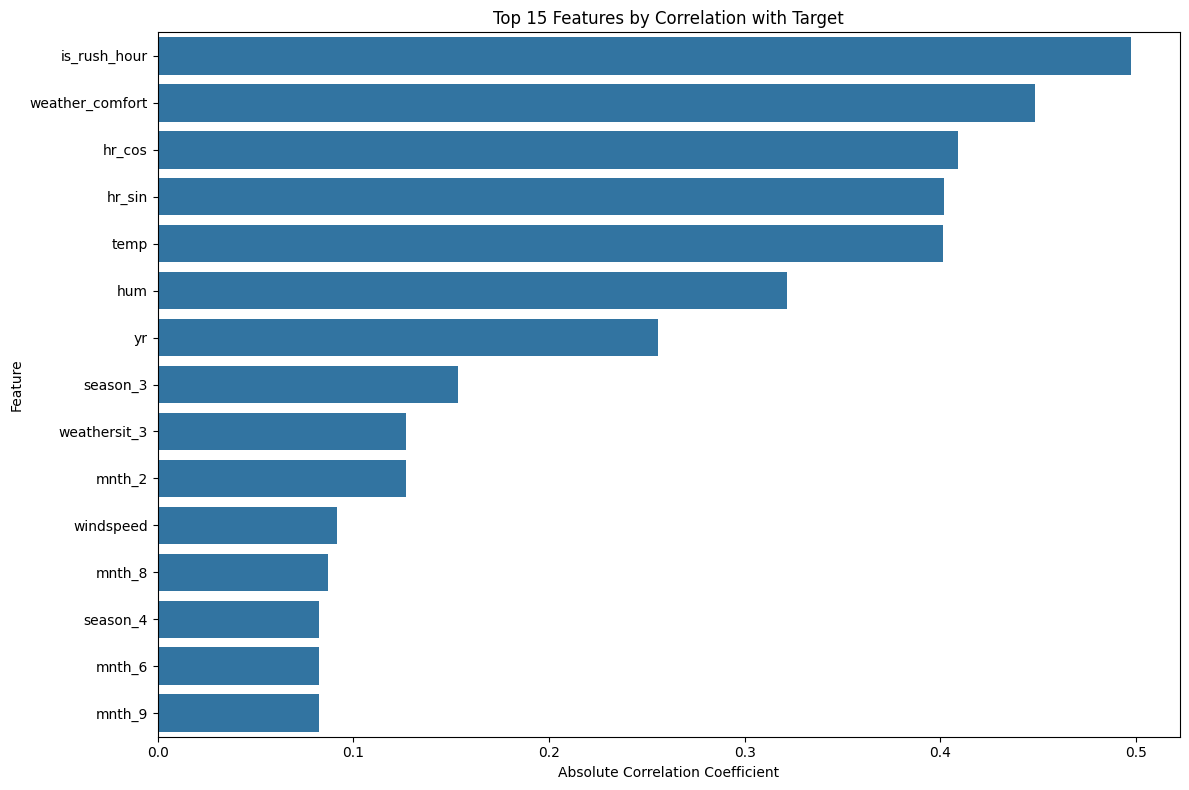

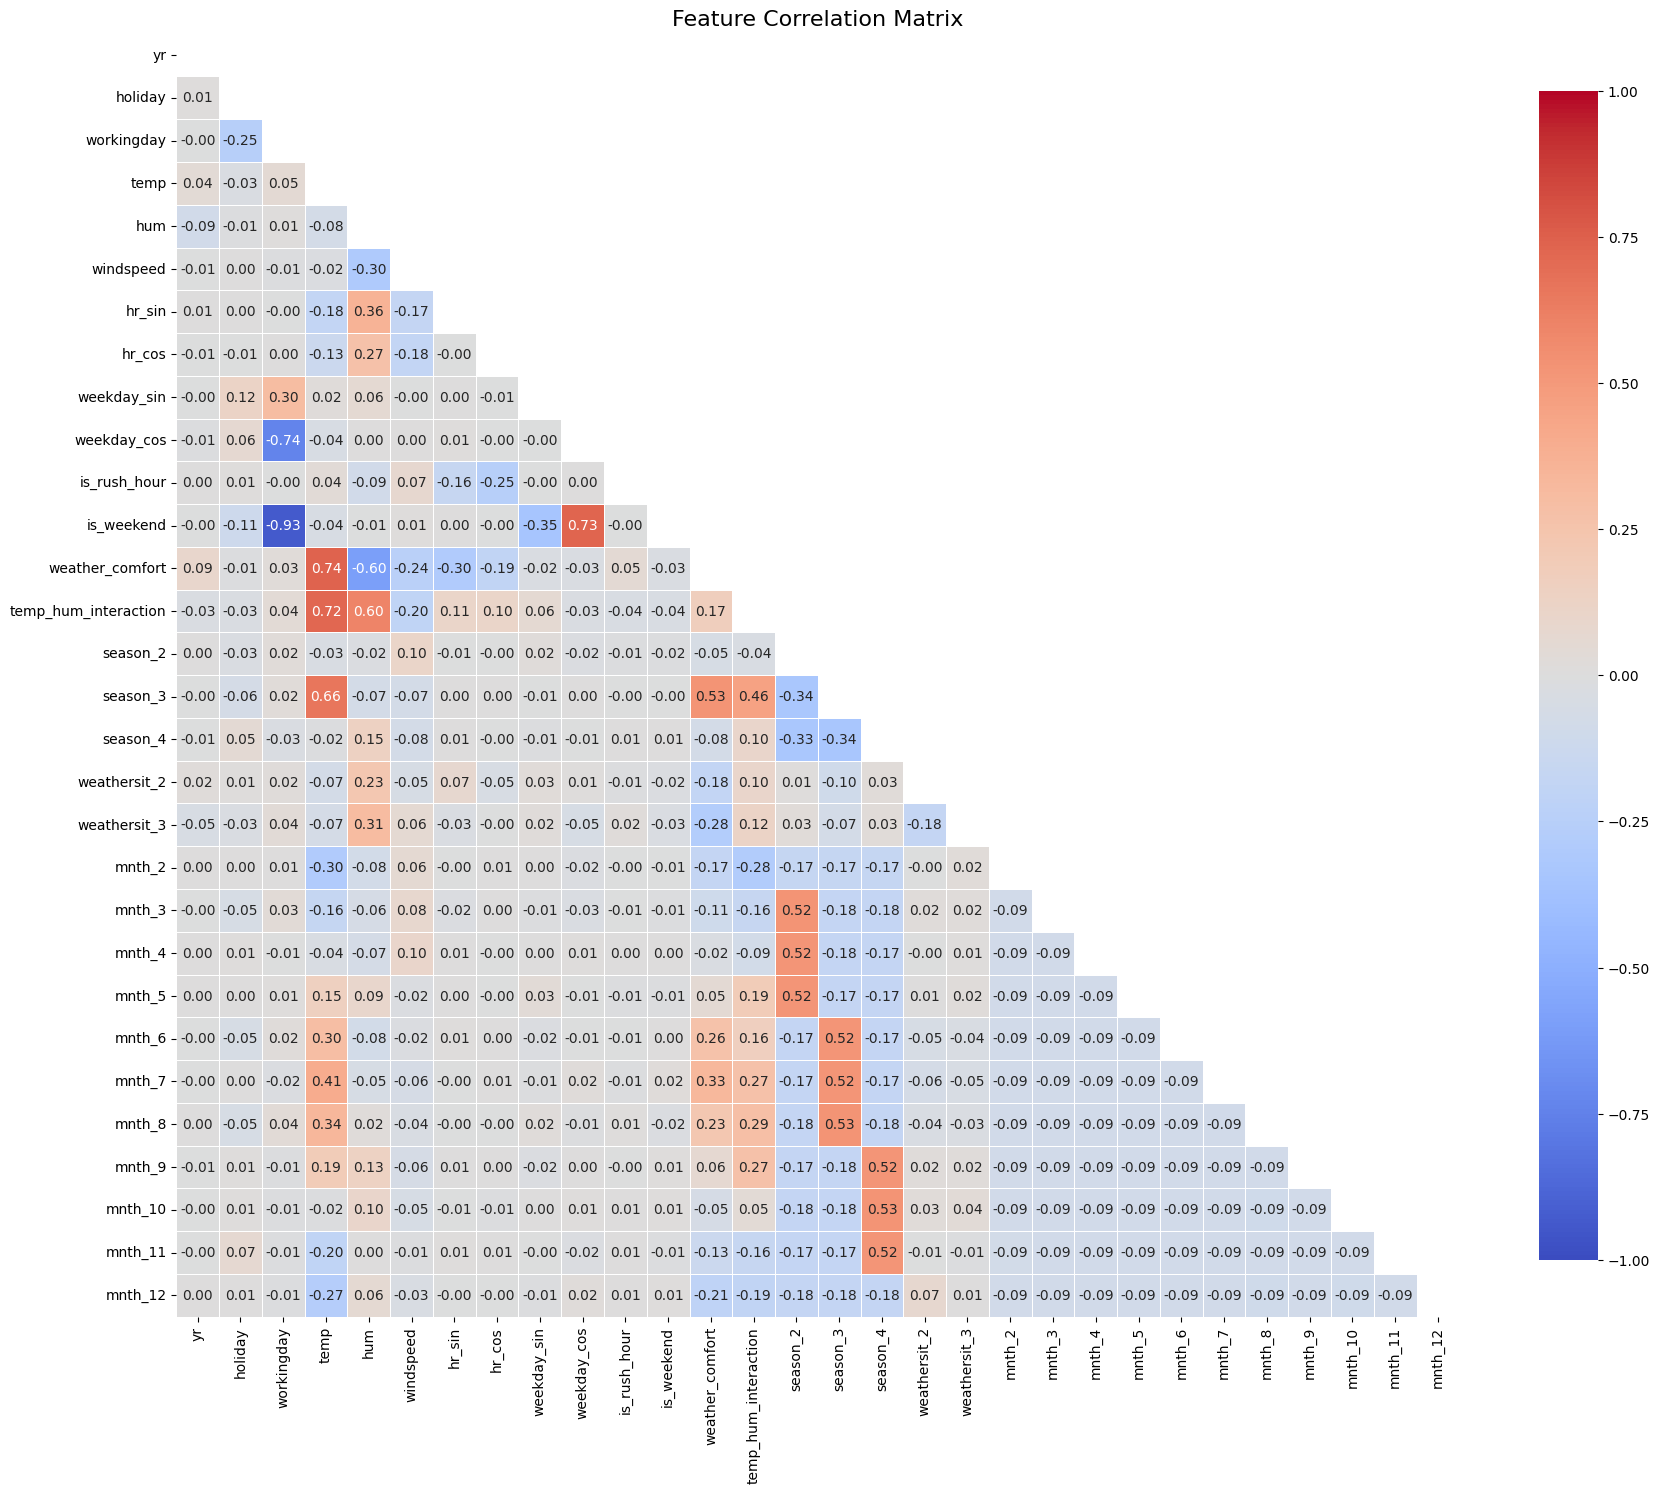


Feature Engineering Summary:
- Final features: 30
- Training samples: 10427
- Validation samples: 3476
- Test samples: 3476

Task 3 completed: Feature Engineering


In [20]:
# Task 3: Feature Engineering

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

print("Starting Task 3: Feature Engineering")

# ---- 1. Drop unnecessary columns ----
# Drop as specified in assignment: instant, dteday, casual, registered
# Also dropping atemp due to high correlation with temp
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
if 'atemp' in X_train.columns:
    columns_to_drop.append('atemp')
    
X_train = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns])
X_val = X_val.drop(columns=[col for col in columns_to_drop if col in X_val.columns])
X_test = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns])

print("Columns after dropping unnecessary features:")
print(X_train.columns.tolist())

# ---- 2. Fix season inconsistencies ----
# Create a correct mapping of Northern Hemisphere months to seasons
correct_season_mapping = {
    12: 1,  # Winter (December)
    1: 1,   # Winter (January)
    2: 1,   # Winter (February)
    3: 2,   # Spring (March)
    4: 2,   # Spring (April)
    5: 2,   # Spring (May)
    6: 3,   # Summer (June)
    7: 3,   # Summer (July)
    8: 3,   # Summer (August)
    9: 4,   # Fall (September)
    10: 4,  # Fall (October)
    11: 4   # Fall (November)
}

# Apply season correction to all sets
X_train['season_original'] = X_train['season']
X_train['season'] = X_train['mnth'].map(correct_season_mapping)

X_val['season_original'] = X_val['season']
X_val['season'] = X_val['mnth'].map(correct_season_mapping)

X_test['season_original'] = X_test['season']
X_test['season'] = X_test['mnth'].map(correct_season_mapping)

# Drop the original season column
X_train = X_train.drop(columns=['season_original'])
X_val = X_val.drop(columns=['season_original'])
X_test = X_test.drop(columns=['season_original'])

print("Season values corrected based on month")

# ---- 3. Cyclical Encoding for Hour and Weekday ----
def cyclical_encode(df, column, max_val):
    df[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / max_val)
    df[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / max_val)
    return df

# Apply cyclical encoding
X_train = cyclical_encode(X_train, 'hr', 24)  # 24-hour cycle (0-23)
X_val = cyclical_encode(X_val, 'hr', 24)
X_test = cyclical_encode(X_test, 'hr', 24)

X_train = cyclical_encode(X_train, 'weekday', 7)  # 7-day cycle (0-6)
X_val = cyclical_encode(X_val, 'weekday', 7)
X_test = cyclical_encode(X_test, 'weekday', 7)

print("Cyclical encoding applied to hour and weekday")

# ---- 4. Create Additional Engineered Features ----
print("\nCreating additional engineered features:")

# 4.1 Rush Hour Indicator
X_train['is_rush_hour'] = ((X_train['hr'] >= 7) & (X_train['hr'] <= 9)) | ((X_train['hr'] >= 16) & (X_train['hr'] <= 19))
X_train['is_rush_hour'] = X_train['is_rush_hour'].astype(int)
X_val['is_rush_hour'] = ((X_val['hr'] >= 7) & (X_val['hr'] <= 9)) | ((X_val['hr'] >= 16) & (X_val['hr'] <= 19))
X_val['is_rush_hour'] = X_val['is_rush_hour'].astype(int)
X_test['is_rush_hour'] = ((X_test['hr'] >= 7) & (X_test['hr'] <= 9)) | ((X_test['hr'] >= 16) & (X_test['hr'] <= 19))
X_test['is_rush_hour'] = X_test['is_rush_hour'].astype(int)
print("- Added 'is_rush_hour' indicator")

# 4.2 Weekend Indicator
X_train['is_weekend'] = (X_train['weekday'].isin([0, 6])).astype(int)
X_val['is_weekend'] = (X_val['weekday'].isin([0, 6])).astype(int)
X_test['is_weekend'] = (X_test['weekday'].isin([0, 6])).astype(int)
print("- Added 'is_weekend' indicator")

# 4.3 Weather Comfort Score
X_train['weather_comfort'] = X_train['temp'] - X_train['hum'] - X_train['windspeed']
X_val['weather_comfort'] = X_val['temp'] - X_val['hum'] - X_val['windspeed']
X_test['weather_comfort'] = X_test['temp'] - X_test['hum'] - X_test['windspeed']
print("- Added 'weather_comfort' score")

# 4.4 Temperature-Humidity Interaction
X_train['temp_hum_interaction'] = X_train['temp'] * X_train['hum']
X_val['temp_hum_interaction'] = X_val['temp'] * X_val['hum']
X_test['temp_hum_interaction'] = X_test['temp'] * X_test['hum']
print("- Added 'temp_hum_interaction' term")

# ---- 5. One-Hot Encoding for Categorical Variables ----
categorical_features = ['season', 'weathersit', 'mnth']

# Initialize OneHotEncoder with handle_unknown='ignore'
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit on training data and transform
categorical_encoded_train = onehot_encoder.fit_transform(X_train[categorical_features])
categorical_encoded_val = onehot_encoder.transform(X_val[categorical_features])
categorical_encoded_test = onehot_encoder.transform(X_test[categorical_features])

# Get feature names for one-hot encoded columns
onehot_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

print(f"One-hot encoding applied to {categorical_features}")

# ---- 6. Scaling Continuous Features ----
continuous_features = ['temp', 'hum', 'windspeed']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train[continuous_features])

# Transform the data
X_train[continuous_features] = scaler.transform(X_train[continuous_features])
X_val[continuous_features] = scaler.transform(X_val[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

print(f"Scaling applied to {continuous_features}")

# ---- 7. Drop original categorical features and cyclical features ----
# Drop original categorical features and cyclical features after transformation
X_train = X_train.drop(columns=['hr', 'weekday'] + categorical_features)
X_val = X_val.drop(columns=['hr', 'weekday'] + categorical_features)
X_test = X_test.drop(columns=['hr', 'weekday'] + categorical_features)

# ---- 8. Add one-hot encoded features ----
# Convert to DataFrame and add to data
encoded_train_df = pd.DataFrame(categorical_encoded_train, columns=onehot_feature_names, index=X_train.index)
encoded_val_df = pd.DataFrame(categorical_encoded_val, columns=onehot_feature_names, index=X_val.index)
encoded_test_df = pd.DataFrame(categorical_encoded_test, columns=onehot_feature_names, index=X_test.index)

# Join the encoded features
X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_val = pd.concat([X_val, encoded_val_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

# ---- 9. Feature Importance Analysis ----
# Check for any remaining high correlations
correlation_matrix = X_train.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in correlation_matrix.columns if any(upper_triangle[column] > 0.8)]

if high_corr_features:
    print(f"\nRemaining high correlation features: {high_corr_features}")
    print("Consider removing these in the modeling phase if needed.")

# Create correlation with target
feature_corr = pd.DataFrame({
    'Feature': X_train.columns,
    'Correlation': [abs(X_train[col].corr(y_train)) for col in X_train.columns]
})
feature_corr = feature_corr.sort_values('Correlation', ascending=False)

print("\nTop 10 features by correlation with target:")
print(feature_corr.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_corr.head(15)
sns.barplot(x='Correlation', y='Feature', data=top_features)
plt.title('Top 15 Features by Correlation with Target')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 16))
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Final feature engineering summary
print("\nFeature Engineering Summary:")
print(f"- Final features: {X_train.shape[1]}")
print(f"- Training samples: {X_train.shape[0]}")
print(f"- Validation samples: {X_val.shape[0]}")
print(f"- Test samples: {X_test.shape[0]}")

print("\nTask 3 completed: Feature Engineering")